In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.getcwd()

'C:\\Users\\david\\Downloads'

In [3]:
df = pd.read_csv('model.csv')
df.head(3)
df.shape
df

,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,Female,44,1,M,30,No,1-2 Year,Yes,25741,154,152,0
1,2,Male,23,1,M,3,Yes,< 1 Year,No,2630,152,256,0
2,3,Male,43,1,C,28,No,1-2 Year,Yes,70720,52,224,0
3,4,Male,60,1,B,28,Yes,1-2 Year,No,48512,26,86,0
4,5,Female,42,1,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
102346,102347,Female,25,1,B,32,Yes,< 1 Year,No,34695,152,133,0
102347,102348,Female,47,1,M,28,No,1-2 Year,Yes,30564,26,114,1
102348,102349,Male,72,1,M,8,No,> 2 Years,Yes,52844,124,92,1
102349,102350,Female,25,1,M,11,Yes,< 1 Year,No,26343,152,127,0


In [4]:
# Checking type of data for each atribute\n",
df.dtypes

id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Licence_Type            object
Region_Code              int64
Previously_Insured      object
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Seniority                int64
Target                   int64
dtype: object

In [5]:
# Looking for NA values in each column\n",
n_nan = df.isna().sum()
n_nan

id                         0
Gender                     0
Age                        0
Driving_License            0
Licence_Type            5091
Region_Code                0
Previously_Insured         0
Vehicle_Age                0
Vehicle_Damage             0
Annual_Premium             0
Policy_Sales_Channel       0
Seniority                  0
Target                     0
dtype: int64

In [6]:
# Replacing Nan with N "No Lycense Type"
df["Licence_Type"].fillna("N", inplace = True)

In [7]:
# People without driving license
df["Licence_Type"].value_counts()

C    19835
M    19686
D    19566
B    19306
A    18867
N     5091
Name: Licence_Type, dtype: int64

In [8]:
# eliminate column driving license which is explained by license type
df2 = pd.DataFrame.copy(df),
df2 = df.drop(columns=['id','Driving_License'])
df2

,Gender,Age,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,Female,44,M,30,No,1-2 Year,Yes,25741,154,152,0
1,Male,23,M,3,Yes,< 1 Year,No,2630,152,256,0
2,Male,43,C,28,No,1-2 Year,Yes,70720,52,224,0
3,Male,60,B,28,Yes,1-2 Year,No,48512,26,86,0
4,Female,42,B,46,No,1-2 Year,Yes,32169,124,132,0
...,...,...,...,...,...,...,...,...,...,...,...
102346,Female,25,B,32,Yes,< 1 Year,No,34695,152,133,0
102347,Female,47,M,28,No,1-2 Year,Yes,30564,26,114,1
102348,Male,72,M,8,No,> 2 Years,Yes,52844,124,92,1
102349,Female,25,M,11,Yes,< 1 Year,No,26343,152,127,0


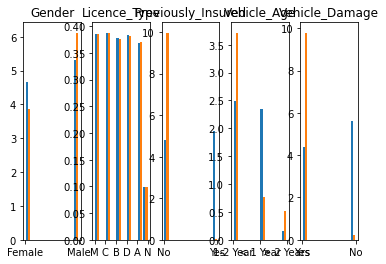

In [9]:
#Plot the categorical values
df_categorical=df2.select_dtypes(include=['object'])
df_0=df_categorical[df2['Target']==0] # records wih target==1
df_1=df_categorical[df2['Target']==1] # records wih target==0


fig, axes = plt.subplots(1, 5, figsize=[8,8])
axes = axes.flatten()
i=0
for x in df_categorical.columns:
    plt.sca(axes[i]) # set the current Axes
    plt.hist([df_0[x],df_1[x]],density=True)
    plt.title(x)
    i+=1
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000020A560D3EE0>,
      dtype=object)

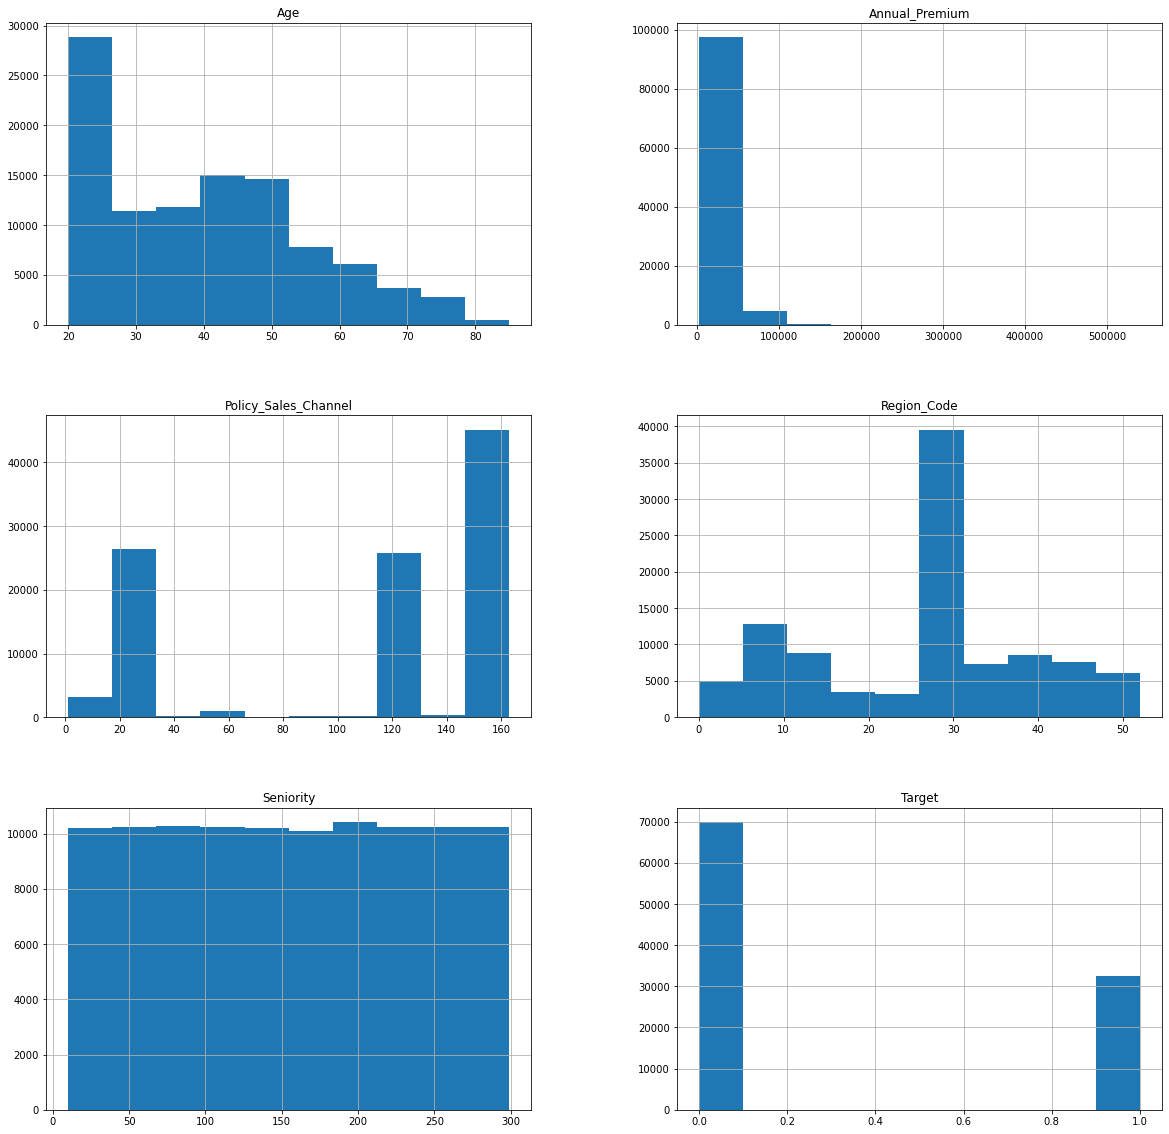

In [10]:
#Plot the numerical values
df_numerical=df2.select_dtypes(include=['int64','float64'])
df_numerical.hist(figsize=(20,20))

In [11]:
#see the correlation between target and License Type
ndl = df['Target'].groupby(df['Licence_Type']).sum()
dframe = pd.DataFrame(df["Licence_Type"].value_counts())
dframe['Target'] = ndl
dframe['Proportion'] = dframe['Target']/dframe['Licence_Type']
dframe

,Licence_Type,Target,Proportion
C,19835,6296,0.317419
M,19686,6254,0.317688
D,19566,6189,0.316314
B,19306,6096,0.315757
A,18867,6024,0.319288
N,5091,1614,0.317030


{'whiskers': [<matplotlib.lines.Line2D at 0x20a5762d310>,
 'caps': [<matplotlib.lines.Line2D at 0x20a5762d9d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x20a57617f70>],
 'medians': [<matplotlib.lines.Line2D at 0x20a576380d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x20a576383d0>],
 'means': []}

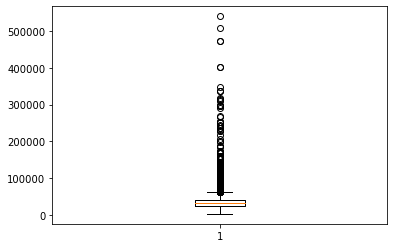

In [12]:
#see if there are outliers in Annual Premium
ax = plt.boxplot(x=df2["Annual_Premium"])
ax

In [13]:
#separate some numerical columns
df3 = df2[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel','Seniority']]
df3

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority
0,44,30,25741,154,152
1,23,3,2630,152,256
2,43,28,70720,52,224
3,60,28,48512,26,86
4,42,46,32169,124,132
...,...,...,...,...,...
102346,25,32,34695,152,133
102347,47,28,30564,26,114
102348,72,8,52844,124,92
102349,25,11,26343,152,127


In [14]:
#standardize the numerical columns
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler(copy=False) #or alternatively use MinMaxScaler
scaler2.fit(df3.astype(float))
scaler2.transform(df3.astype(float))

array([[ 0.27669648,  0.2696718 , -0.28542256,  0.8421219 , -0.03017896],
       [-1.1293288 , -1.82257112, -1.60269089,  0.8059732 ,  1.21183733],
       [ 0.20974289,  0.11469084,  2.27826624, -1.00146177,  0.82967847],
       ...,
       [ 2.15139684, -1.43511873,  1.25937963,  0.29989141, -0.74672682],
       [-0.99542163, -1.20264729, -0.25111009,  0.8059732 , -0.32874057],
       [ 2.01748967,  0.11469084, -1.60269089,  0.26374271, -1.16471307]])

In [15]:
#transform the standardize values into a dataframe
df3_scaled=pd.DataFrame(scaler2.transform(df3.astype(float)))
df3_scaled.columns=df3.columns
df3_scaled.head()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority
0,0.276696,0.269672,-0.285423,0.842122,-0.030179
1,-1.129329,-1.822571,-1.602691,0.805973,1.211837
2,0.209743,0.114691,2.278266,-1.001462,0.829678
3,1.347954,0.114691,1.012467,-1.471395,-0.818382
4,0.142789,1.509519,0.080957,0.299891,-0.269028


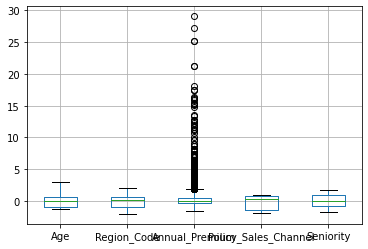

In [16]:
df3_scaled.boxplot()

In [17]:
#To see if there are duplicates
df[df.duplicated()]


,id,Gender,Age,Driving_License,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target


In [18]:
df3.describe()

,Age,Region_Code,Annual_Premium,Policy_Sales_Channel,Seniority
count,102351.000000,102351.000000,102351.000000,102351.000000,102351.000000
mean,39.867339,26.519936,30748.636398,107.407900,154.527030
std,14.935793,12.904874,17544.726810,55.327295,83.735221
min,20.000000,0.000000,2630.000000,1.000000,10.000000
25%,25.000000,15.000000,24435.500000,26.000000,82.000000
50%,39.000000,28.000000,31943.000000,124.000000,155.000000
75%,50.000000,35.000000,39774.000000,152.000000,227.000000
max,85.000000,52.000000,540165.000000,163.000000,299.000000


152    29978
26     24504
124    22317
160     4778
156     3424
       ...  
73         1
137        1
75         1
117        1
41         1
Name: Policy_Sales_Channel, Length: 142, dtype: int64

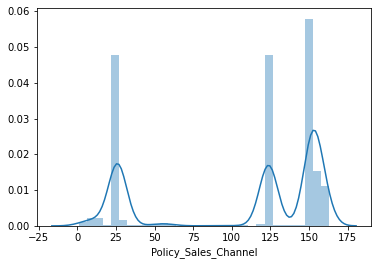

In [19]:
sns.distplot(df['Policy_Sales_Channel'])
df['Policy_Sales_Channel'].value_counts()

In [20]:
#replace the normalized values in the new matrix
df2[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel','Seniority']] = df3_scaled[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel','Seniority']]

In [21]:
#convert some categorical values
cleanup_nums = {"Previously_Insured": {"No": 0, "Yes": 1},"Vehicle_Damage": {"No": 0, "Yes": 1}, "Vehicle_Age": {"< 1 Year": 0, "1-2 Year": 1, "> 2 Years": 2},"Licence_Type": {"N": 0, "A": 1, "B": 2, "C": 3, "D": 4, "M": 5}}
df2.replace(cleanup_nums, inplace=True)

In [22]:
#split Gender into two columns
dummie=pd.get_dummies(df2, columns=["Gender"])

In [23]:
#order the dataframe
Dfinal=dummie[['Gender_Female', 'Gender_Male','Age', 'Licence_Type', 'Region_Code', 'Previously_Insured', 'Vehicle_Age','Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Seniority', 'Target']]
Dfinal

,Gender_Female,Gender_Male,Age,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,0,0.276696,5,0.269672,0,1,1,-0.285423,0.842122,-0.030179,0
1,0,1,-1.129329,5,-1.822571,1,0,0,-1.602691,0.805973,1.211837,0
2,0,1,0.209743,3,0.114691,0,1,1,2.278266,-1.001462,0.829678,0
3,0,1,1.347954,2,0.114691,1,1,0,1.012467,-1.471395,-0.818382,0
4,1,0,0.142789,2,1.509519,0,1,1,0.080957,0.299891,-0.269028,0
...,...,...,...,...,...,...,...,...,...,...,...,...
102346,1,0,-0.995422,2,0.424653,1,0,0,0.224933,0.805973,-0.257086,0
102347,1,0,0.477557,5,0.114691,0,1,1,-0.010524,-1.471395,-0.483993,1
102348,0,1,2.151397,5,-1.435119,0,2,1,1.259380,0.299891,-0.746727,1
102349,1,0,-0.995422,5,-1.202647,1,0,0,-0.251110,0.805973,-0.328741,0


In [24]:
from matplotlib.ticker import PercentFormatter

Frec = pd.value_counts(df2['Policy_Sales_Channel'])
Frec_df = pd.DataFrame(Frec)
Frec_df.columns = ["Frec_abs"]
Frec_df['Frec_Rel'] = 100*Frec_df["Frec_abs"]/len(df2)

Frec_rel_values = Frec_df['Frec_Rel'].values

In [25]:
#test the number of Policy_Sale_Channel codes that were used just once
dap = pd.DataFrame(Dfinal["Policy_Sales_Channel"].value_counts().gt(1))
dap = dap[dap.Policy_Sales_Channel != 1]
#filter out values that only appear once in the Policy_Sales_Channel
Dfg= Dfinal[Dfinal.groupby('Policy_Sales_Channel').Policy_Sales_Channel.transform('count') > 1]
Dfg


,Gender_Female,Gender_Male,Age,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,0,0.276696,5,0.269672,0,1,1,-0.285423,0.842122,-0.030179,0
1,0,1,-1.129329,5,-1.822571,1,0,0,-1.602691,0.805973,1.211837,0
2,0,1,0.209743,3,0.114691,0,1,1,2.278266,-1.001462,0.829678,0
3,0,1,1.347954,2,0.114691,1,1,0,1.012467,-1.471395,-0.818382,0
4,1,0,0.142789,2,1.509519,0,1,1,0.080957,0.299891,-0.269028,0
...,...,...,...,...,...,...,...,...,...,...,...,...
102346,1,0,-0.995422,2,0.424653,1,0,0,0.224933,0.805973,-0.257086,0
102347,1,0,0.477557,5,0.114691,0,1,1,-0.010524,-1.471395,-0.483993,1
102348,0,1,2.151397,5,-1.435119,0,2,1,1.259380,0.299891,-0.746727,1
102349,1,0,-0.995422,5,-1.202647,1,0,0,-0.251110,0.805973,-0.328741,0


In [26]:
#see wether there's a 
dag = pd.DataFrame(Dfg["Region_Code"].value_counts())
dag

,Region_Code
0.114691,31758
-1.435119,8600
1.509519,5182
1.122067,4926
-0.892685,3301
0.269672,3008
0.192181,2932
-1.822571,2482
-1.202647,2470
1.819481,2445


In [27]:
#since it is normal then I CAN REMOVE OUTLIERS Using Normal Distribution and S.D
mean = Dfg['Annual_Premium'].mean()
sd = Dfg['Annual_Premium'].std()

# keep only the ones that are within +x to -x standard deviations in the column DIS
dfg = Dfg['Annual_Premium'][ np.abs(Dfg['Annual_Premium'] - mean) <= 3 * sd ]
da = pd.DataFrame(dfg)
da

,Annual_Premium
0,-0.285423
1,-1.602691
2,2.278266
3,1.012467
4,0.080957
...,...
102346,0.224933
102347,-0.010524
102348,1.259380
102349,-0.251110


In [28]:
#Detect and delete o
from scipy import stats
Dfgs=Dfg[(np.abs(stats.zscore(Dfg)) < 3).all(axis = 1)]
Dfgs

,Gender_Female,Gender_Male,Age,Licence_Type,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Seniority,Target
0,1,0,0.276696,5,0.269672,0,1,1,-0.285423,0.842122,-0.030179,0
1,0,1,-1.129329,5,-1.822571,1,0,0,-1.602691,0.805973,1.211837,0
2,0,1,0.209743,3,0.114691,0,1,1,2.278266,-1.001462,0.829678,0
3,0,1,1.347954,2,0.114691,1,1,0,1.012467,-1.471395,-0.818382,0
4,1,0,0.142789,2,1.509519,0,1,1,0.080957,0.299891,-0.269028,0
...,...,...,...,...,...,...,...,...,...,...,...,...
102346,1,0,-0.995422,2,0.424653,1,0,0,0.224933,0.805973,-0.257086,0
102347,1,0,0.477557,5,0.114691,0,1,1,-0.010524,-1.471395,-0.483993,1
102348,0,1,2.151397,5,-1.435119,0,2,1,1.259380,0.299891,-0.746727,1
102349,1,0,-0.995422,5,-1.202647,1,0,0,-0.251110,0.805973,-0.328741,0


Target
0    69508
1    32261
dtype: int64


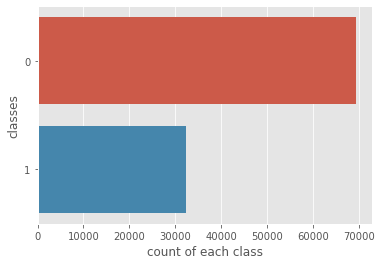

In [29]:
#Print class freq. through pandas 
print(Dfgs.groupby('Target').size()) #"target" is the name of the target column, change it accordingly to your dataset

#some imports to plot 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('ggplot')

#Visualize Class Counts
sns.countplot(y=Dfgs.Target ,data=Dfgs) #"target" is the name of the target column, change it accordingly to your dataset
plt.xlabel("count of each class")
plt.ylabel("classes")
plt.show()

In [30]:
from sklearn.metrics import accuracy_score

y=Dfgs['Target']
y_pred=np.zeros(len(y))

accuracy_score(y, y_pred)


0.6829977694582829

In [31]:
from sklearn.utils import resample

#Down-sample Majority Class
#1) Separate majority and minority classes
df_majority = Dfgs[Dfgs.Target==0] #"target" is the name of the target column, change it accordingly to your dataset
df_minority = Dfgs[Dfgs.Target==1] #"target" is the name of the target column, change it accordingly to your dataset

#2) Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                   replace=False,
                                   n_samples=32261,     # number of samples into the minority class (change it accordingly to your dataset)
                                   random_state=123)  # reproducible results

#3) Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

#4) Display new class counts
df_downsampled.Target.value_counts() #"target" is the name of the target column, change it accordingly to your dataset

1    32261
0    32261
Name: Target, dtype: int64

In [32]:
#Separate X and y (explanatory variables and target variable)
X = Dfgs.iloc[:,0:-1]
column_names = list(X)
y = Dfgs.iloc[:,-1]

In [33]:
from sklearn.model_selection import train_test_split

#SPLIT DATA INTO TRAIN AND TEST SET
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size =0.30, #by default is 75%-25%
                                                    #shuffle is set True by default,
                                                    stratify=y,
                                                    random_state= 123)

print(X_train.shape)
print(X_test.shape)

(71238, 11)
(30531, 11)


In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.metrics import f1_score

In [35]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier()
parameters = {'n_neighbors':np.arange(10,1000,100)}

def hyperp_search(classifier, parameters):
    gs = GridSearchCV(classifier, parameters, cv=3, scoring = 'f1', verbose=0, n_jobs=-1)
    gs = gs.fit(X_train, y_train)
    print("f1_train: %f using %s" % (gs.best_score_, gs.best_params_))

    best_model = gs.best_estimator_
    y_pred = best_model.predict(X_test)

    print("f1_test: ", f1_score(y_test, y_pred))
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))


In [36]:
hyperp_search(classifier,parameters)

KeyboardInterrupt: 

In [ ]:
model_knn = KNeighborsClassifier(n_neighbors=10)

def roc(model,X_train,y_train,X_test,y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

    fpr, tpr, thresholds1=metrics.roc_curve(y_test,  y_probs[:,1])

    import matplotlib.pyplot as plt
    plt.plot(fpr, tpr, label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    auc = metrics.roc_auc_score(y_test, y_probs[:,1])
    print('AUC: %.2f' % auc)
    return (fpr, tpr)

fpr1,tpr1=roc(model_knn,X_train,y_train,X_test,y_test)

In [ ]:
# Naive Bayes
from sklearn.naive_bayes import GaussianNB #or alternative NB implementations

model = GaussianNB()

model.fit(X_train, y_train)
y_pred=model.predict(X_test)

from sklearn.metrics import f1_score
print("f1_score: ", f1_score(y_test, y_pred))

print("f1_test: ", f1_score(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

In [ ]:
y_probs = model.predict_proba(X_test) #predict_proba gives the probabilities for the target (0 and 1 in your case) 

fpr2,tpr2=roc(model,X_train,y_train,X_test,y_test)

In [ ]:
#Tree

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
parameters = {'criterion': ['entropy','gini'], 
              'max_depth': [4,5,10],
              'min_samples_split': [20],
              'min_samples_leaf': [10]}

hyperp_search(classifier,parameters)

# criterion : "gini", "entropy"
# max_depth : The maximum depth of the tree.
# min_samples_split : The minimum number of samples required to split an internal node:
# min_samples_leaf : The minimum number of samples required to be at a leaf node. 

In [ ]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)

fpr3,tpr3=roc(model_tree,X_train,y_train,X_test,y_test)

In [ ]:
from sklearn import tree
r = tree.export_text(model_tree,feature_names=X_test.columns.tolist(),max_depth=3)
print(r)


In [ ]:
# Multi-layer Perceptron classifier

from sklearn.neural_network import MLPClassifier

classifier = MLPClassifier()
parameters = {"hidden_layer_sizes":[(10, 5),(100,20,5)],  "max_iter": [2000], "alpha": [0.001,0.1]}

In [ ]:
hyperp_search(classifier,parameters)

In [ ]:
model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)

fpr4,tpr4=roc(model_MLP,X_train,y_train,X_test,y_test)

In [ ]:
plt.plot(fpr1, tpr1, label= "KNN")
plt.plot(fpr2, tpr2, label= "Naive Bayes")
plt.plot(fpr3, tpr3, label= "Tree")
plt.plot(fpr4, tpr4, label= "MLPC")
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
#reading and fixing the test data set
dfpred=pd.read_csv('model.csv') #here we will insert the test dataset
# Looking for NA values in each column\n",
n_nanpred = dfpred.isna().sum()
# Replacing Nan with N "No Lycense Type"
dfpred["Licence_Type"].fillna("N", inplace = True)
# eliminate column driving license which is explained by license type
df2pred = pd.DataFrame.copy(dfpred),
df2pred = dfpred.drop(columns=['id','Driving_License'])
#separate some numerical columns
df3pred = df2pred[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel','Seniority']]
#standardize the numerical columns
from sklearn.preprocessing import StandardScaler
scaler2pred = StandardScaler(copy=False) #or alternatively use MinMaxScaler
scaler2pred.fit(df3pred.astype(float))
scaler2pred.transform(df3pred.astype(float))
#transform the standardize values into a dataframe
df3pred_scaled=pd.DataFrame(scaler2pred.transform(df3pred.astype(float)))
df3pred_scaled.columns=df3pred.columns
#replace the normalized values in the new matrix
df2pred[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel','Seniority']] = df3pred_scaled[['Age', 'Region_Code', 'Annual_Premium', 'Policy_Sales_Channel','Seniority']]
#convert some categorical values
cleanup_numspred = {"Previously_Insured": {"No": 0, "Yes": 1},"Vehicle_Damage": {"No": 0, "Yes": 1}, "Vehicle_Age": {"< 1 Year": 0, "1-2 Year": 1, "> 2 Years": 2},"Licence_Type": {"N": 0, "A": 1, "B": 2, "C": 3, "D": 4, "M": 5}}
df2pred.replace(cleanup_numspred, inplace=True)
#split Gender into two columns
dummiepred=pd.get_dummies(df2pred, columns=["Gender"])
#order the dataframe
Xpred=dummiepred[['Gender_Female', 'Gender_Male','Age', 'Licence_Type', 'Region_Code', 'Previously_Insured', 'Vehicle_Age','Vehicle_Damage', 'Annual_Premium', 'Policy_Sales_Channel', 'Seniority']]

In [ ]:
model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)
model_tree.fit(X, y)

y2_pred = model_tree.predict(Xpred)

y2=dfpred.Target
print("f1_test: ", f1_score(y2, y2_pred))
print(confusion_matrix(y2, y2_pred))
print(classification_report(y2, y2_pred))

In [ ]:
from sklearn.neural_network import MLPClassifier

model_MLP=MLPClassifier(hidden_layer_sizes=(10,5), alpha=0.1, max_iter=2000)
model_MLP.fit(X, y)

y_MLP = model_MLP.predict(Xpred)

print("f1_test: ", f1_score(y2,y_MLP))
print(confusion_matrix(y2,y_MLP))
print(classification_report(y2,y_MLP))


In [ ]:
# Retrain the model (with the entire dataset)

model_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=10, min_samples_split=20)
model_tree.fit(X, y)

y_tree = model_tree.predict(Xpred)

y2=dfpred.Target
print("f1_test: ", f1_score(y2,y_tree))
print(confusion_matrix(y2,y_tree))
print(classification_report(y2,y_tree))

In [ ]:
predictions=pd.DataFrame()
predictions['tree']=y_tree

predictions.to_csv('filepredictions.csv')